In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.datasets import fashion_mnist
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D
from sklearn.metrics import confusion_matrix

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
0 255 0 255


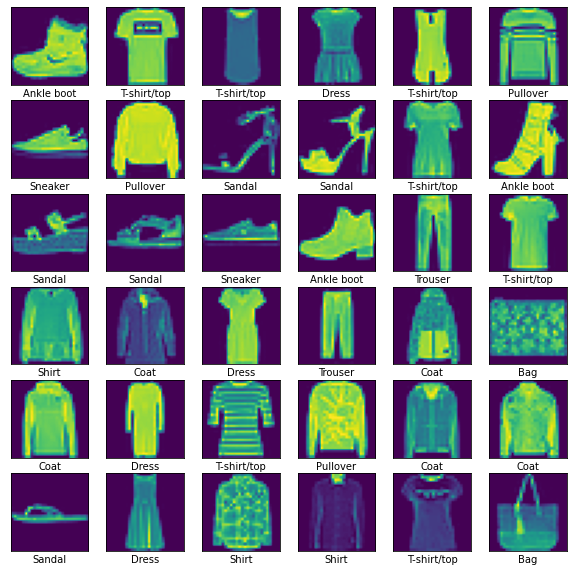

In [2]:
# 画像とラベルのデータのロード
(X_train_image, Y_train_label), (X_test_image, Y_test_label) = fashion_mnist.load_data()
print(X_train_image.shape, Y_train_label.shape, X_test_image.shape, Y_test_label.shape)
# ((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# 値域を確認
print(np.min(X_train_image), np.max(X_train_image), np.min(X_test_image), np.max(X_test_image))
# (0, 255, 0, 255)

# ラベルデータをセット
# https://github.com/zalandoresearch/fashion-mnist#labels
label_map = pd.Series([
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
])

# 36枚を表示
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_image[i])
    plt.xlabel(label_map[Y_train_label[i]])

In [4]:
# 0.0〜1.0へ正規化
X_train = X_train_image.astype('float32')
X_test = X_test_image.astype('float32')
X_train /= 255
X_test /= 255

# チャネルの追加
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

# one-hotエンコーディング
num_labels = label_map.size
Y_train = keras.utils.to_categorical(Y_train_label, num_labels)
Y_test = keras.utils.to_categorical(Y_test_label, num_labels)

# モデルを作る
input_shape = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), padding='valid', activation='relu'))
model.add(AveragePooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_labels, activation='softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adadelta(),
    metrics=['accuracy']
)

# 学習
epochs = 1
batch_size = 1000

history = model.fit(
    x=X_train,y=Y_train, epochs=epochs, batch_size=batch_size, 
    validation_data=(X_test, Y_test), verbose=1
)

60/60 [==============================] - 26s 432ms/step - loss: 2.3071 - accuracy: 0.1095 - val_loss: 2.3068 - val_accuracy: 0.1078


In [5]:
# 畳み込み層のみを抽出
conv_layers = [l.output for l in model.layers[:4]]
conv_model = Model(inputs=model.inputs, outputs=conv_layers)

# 畳み込み層の出力を取得
conv_outputs = conv_model.predict(X_test)

for i in range(len(conv_outputs)):
    print(f'layer {i}:{conv_outputs[i].shape}')

# layer 0:(10000, 28, 28, 6)
# layer 1:(10000, 14, 14, 6)
# layer 2:(10000, 10, 10, 16)
# layer 3:(10000, 5, 5, 16)

layer 0:(10000, 28, 28, 6)
layer 1:(10000, 14, 14, 6)
layer 2:(10000, 10, 10, 16)
layer 3:(10000, 5, 5, 16)


In [6]:
def plot_conv_outputs(outputs):
    filters = outputs.shape[2]
    for i in range(filters):
        plt.subplot(filters/6 + 1, 6, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(f'filter {i}')
        plt.imshow(outputs[:,:,i])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


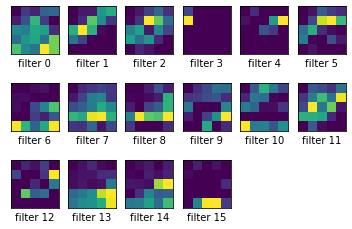

In [7]:
# 1層目 (Conv2D)
plot_conv_outputs(conv_outputs[0][0])
# 2層目 (AveragePooling2D)
plot_conv_outputs(conv_outputs[1][0])
# 3層目 (Conv2D)
plot_conv_outputs(conv_outputs[2][0])
# 4層目 (AveragePooling2D)
plot_conv_outputs(conv_outputs[3][0])

In [ ]:

#https://techblog.nhn-techorus.com/archives/8813

In [ ]:
#フィルタの出力とは
#https://www.youtube.com/watch?v=AgkfIQ4IGaM

In [ ]:
#畳み込みとは
#https://www.youtube.com/watch?v=f0t-OCG79-U

#https://www.youtube.com/watch?v=Qj_LJQj09Ps

In [8]:
from keras.applications import ResNet50
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [9]:
resnet = ResNet50()

102973440/102967424 [==============================] - 4s 0us/step


In [10]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [11]:
weights = resnet.get_layer("conv1_conv").get_weights()[0]

In [12]:
weights.shape

(7, 7, 3, 64)

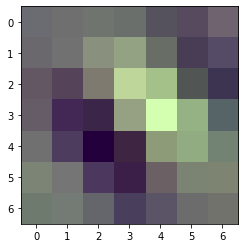

In [13]:
w = weights[:, :, ::-1, 0].copy()
m = w.min()
M = w.max()
w = (w-m)/(M-m)
plt.imshow(w)

In [14]:
#このカーネルを使うとナナメエッジを抽出できる
#畳み込みのすべてのカーネル、フィルタを可視化


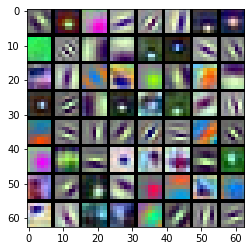

In [15]:
result = Image.new("RGB", (7*8+(8-1), 7*8+(8-1)))
for i in range(64):
    w= weights[:, :, ::-1, i].copy()
    M = w.max()
    m = w.min()
    w = (w-m)/(M-m)
    w *= 255
    img = Image.fromarray(w.astype("uint8"), mode="RGB")
    result.paste(img, (7*(i//8) + (i//8), 7*(i%8)+(i%8)))
plt.imshow(result)

In [ ]:
#動作未確認


In [ ]:
#https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [16]:
from keras import applications

# build the VGG16 network
model = applications.VGG16(include_top=False,
                           weights='imagenet')

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])


58892288/58889256 [==============================] - 0s 0us/step


In [18]:
from keras import backend as K

layer_name = 'block5_conv3'
filter_index = 0  # can be any integer from 0 to 511, as there are 512 filters in that layer

# build a loss function that maximizes the activation
# of the nth filter of the layer considered
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])

In [ ]:

(X_train_image, Y_train_label), (X_test_image, Y_test_label) = fashion_mnist.load_data()

In [22]:
X_train_image[0].shape

(28, 28)

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model


input_img = Input(shape=(28,28,))

In [30]:
# compute the gradient of the input picture wrt this loss
grads = tf.GradientTape(loss, X_train_image[0])[0]


TypeError: ignored

In [ ]:
# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

In [ ]:
import numpy as np

# we start from a gray image with some noise
input_img_data = np.random.random((1, 3, img_width, img_height)) * 20 + 128.
# run gradient ascent for 20 steps
for i in range(20):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step


NameError: ignored

In [ ]:
from scipy.misc import imsave

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data[0]
img = deprocess_image(img)
imsave('%s_filter_%d.png' % (layer_name, filter_index), img)


ImportError: ignored